# Loading Supervizor transactions data dump into Pandas

This Notebook was used as an introduction to Python Pandas, so it's a bit more verbose than necessary.

Jure Čuhalev - <jure@cuhalev.com>

To run this Notebook, you'll need:
 - Pandas
 - xlrd, xlwt (to read and write Excel files)

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

# Load data

Source: http://www.ujp.gov.si/dokumenti/dokument.asp?id=127 - SEZNAMI REGISTRA PRORAČUNSKIH UPORABNIKOV (RPU)

In [3]:
gov_df = pd.read_excel('data/RPUSeznam_03.06.2015.xls', 
                       sheetname='SEZNAM RPU',
                       header=3)
gov_df.head()

,Tip,Skupina,Podskupina,Šifra PU,Matična,Davčna,Ustanovitelj,Naziv,Kraj,Občina,...,F,G,H,I,J,Naslov,Poštna številka,Pošta,EZR,Šifra proračuna
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,I,1.1.,11118,5065402000,45181276,1,URAD PREDSEDNIKA REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,...,NaN,NaN,NaN,NaN,J,Erjavčeva cesta 017,1000,LJUBLJANA,1100,10995
2,A,I,1.1.,12114,5022924000,21881677,1,DRŽAVNI ZBOR REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,...,NaN,NaN,NaN,NaN,J,Šubičeva ulica 004,1000,LJUBLJANA,1100,10995
3,A,I,1.1.,12122,5648122000,30558255,1,DRŽAVNI SVET REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,...,NaN,NaN,NaN,NaN,J,Šubičeva ulica 004,1000,LJUBLJANA,1100,10995
4,A,I,1.1.,12130,5525098000,79826989,1,DRŽAVNA VOLILNA KOMISIJA,Ljubljana,LJUBLJANA,...,NaN,NaN,NaN,NaN,J,Slovenska cesta 054,1000,LJUBLJANA,1100,10995


## Grab only relevant columns

In [4]:
gov_df = gov_df[['Šifra PU', 'Matična', 'Davčna',
       'Naziv', 'Kraj', 'Občina', 'Naslov', 'Poštna številka', 'Pošta']]
gov_df.columns

Index(['Šifra PU', 'Matična', 'Davčna', 'Naziv', 'Kraj', 'Občina', 'Naslov',
       'Poštna številka', 'Pošta'],
      dtype='object')

In [5]:
gov_df.columns = ['sifra_pu', 'maticna', 'davcna', 'naziv', 'kraj', 'obcina', 'naslov', 'postna_stevilka', 'posta']
gov_df.head()

,sifra_pu,maticna,davcna,naziv,kraj,obcina,naslov,postna_stevilka,posta
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11118,5065402000,45181276,URAD PREDSEDNIKA REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,Erjavčeva cesta 017,1000,LJUBLJANA
2,12114,5022924000,21881677,DRŽAVNI ZBOR REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,Šubičeva ulica 004,1000,LJUBLJANA
3,12122,5648122000,30558255,DRŽAVNI SVET REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,Šubičeva ulica 004,1000,LJUBLJANA
4,12130,5525098000,79826989,DRŽAVNA VOLILNA KOMISIJA,Ljubljana,LJUBLJANA,Slovenska cesta 054,1000,LJUBLJANA


In [6]:
gov_df = gov_df.dropna(subset=['sifra_pu'])

# Basic slicing / Boolean indexing

In [7]:
gov_df.count()

sifra_pu           2823
maticna            2823
davcna             2816
naziv              2823
kraj               2823
obcina             2823
naslov             2823
postna_stevilka    2823
posta              2823
dtype: int64

In [8]:
gov_df[(gov_df.postna_stevilka > 1000) & (gov_df.postna_stevilka < 2000)].count()

sifra_pu           438
maticna            438
davcna             438
naziv              438
kraj               438
obcina             438
naslov             438
postna_stevilka    438
posta              438
dtype: int64

In [9]:
gov_df[(gov_df.postna_stevilka > 1000) & (gov_df.postna_stevilka < 2000)].count()

sifra_pu           438
maticna            438
davcna             438
naziv              438
kraj               438
obcina             438
naslov             438
postna_stevilka    438
posta              438
dtype: int64

In [10]:
gov_df[gov_df.posta == 'LJUBLJANA'].count()

sifra_pu           344
maticna            344
davcna             344
naziv              344
kraj               344
obcina             344
naslov             344
postna_stevilka    344
posta              344
dtype: int64

In [11]:
gov_df[gov_df.naziv.str.contains('SODIŠČE')].count()

sifra_pu           25
maticna            25
davcna             25
naziv              25
kraj               25
obcina             25
naslov             25
postna_stevilka    25
posta              25
dtype: int64

# Load transaction data from Supervizor

Source: http://supervizor.kpk-rs.si/podatki/

In [12]:
transactions_df = pd.read_csv('data/trans201503.csv.gz', low_memory=False)

In [13]:
transactions_df.describe()

,znesek_transakcije,maticna_stevilka,davcna_stevilka,sifra_pu
count,8.699280e+05,8.694600e+05,869928.000000,614526.000000
mean,5.544251e+03,4.581396e+09,56121233.025058,9301964.318834
std,1.243984e+06,1.585990e+09,25775555.507830,21430099.234039
min,1.000000e-02,1.000055e+06,10009981.000000,10995.000000
25%,3.085000e+01,5.025796e+09,35103086.000000,27812.000000
50%,8.174000e+01,5.086035e+09,56086539.000000,67830.000000
75%,2.448800e+02,5.426189e+09,78337496.000000,92118.000000
max,9.970580e+08,6.800840e+09,99999862.000000,99666189.000000


In [14]:
transactions_df.head()

,podracun_v_breme,datum_transakcije,znesek_transakcije,oznaka_valute_transakcije,racun_v_dobro,naziv_prejemnika,maticna_stevilka,davcna_stevilka,sifra_pu,zr_sns_oe,namen
0,010000009000034,2015-03-02,35.00,EUR,013026030717688,LJUDSKA UNIVERZA RADOVLJICA,5052858000,10017399,24009725,NaN,NaN
1,024564303377389,2015-03-02,12.50,EUR,011006030705082,ŠOLSKI CENTER SLOVENJ GRADEC,5089417000,73346276,NaN,NaN,NaN
2,012516030657428,2015-03-02,41.17,EUR,SI56031211061120871,KOPIJA-NOVA družba za trgovino in storitve d.o.o.,1491482000,10031332,65749,NaN,NaN
3,051007017104133,2015-03-02,27.10,EUR,012526030657670,OSNOVNA ŠOLA FRANCETA PREŠERNA KRANJ,5086035000,94256454,NaN,NaN,NaN
4,010000000500021,2015-03-02,206.08,EUR,012486030635653,"VRTEC KOČEVJE Cesta na stadion 3, Kočevje",5055717000,10033823,68297530,NaN,NaN


In [15]:
transactions_df.count()

podracun_v_breme             869928
datum_transakcije            869928
znesek_transakcije           869928
oznaka_valute_transakcije    869928
racun_v_dobro                869928
naziv_prejemnika             869443
maticna_stevilka             869460
davcna_stevilka              869928
sifra_pu                     614526
zr_sns_oe                     18160
namen                         43919
dtype: int64

In [16]:
transactions_df = transactions_df.dropna(subset=['sifra_pu'])

# Merge data

In [17]:
gov_df.head()

,sifra_pu,maticna,davcna,naziv,kraj,obcina,naslov,postna_stevilka,posta
1,11118,5065402000,45181276,URAD PREDSEDNIKA REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,Erjavčeva cesta 017,1000,LJUBLJANA
2,12114,5022924000,21881677,DRŽAVNI ZBOR REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,Šubičeva ulica 004,1000,LJUBLJANA
3,12122,5648122000,30558255,DRŽAVNI SVET REPUBLIKE SLOVENIJE,Ljubljana,LJUBLJANA,Šubičeva ulica 004,1000,LJUBLJANA
4,12130,5525098000,79826989,DRŽAVNA VOLILNA KOMISIJA,Ljubljana,LJUBLJANA,Slovenska cesta 054,1000,LJUBLJANA
5,12149,5855012000,57006229,VARUH ČLOVEKOVIH PRAVIC,Ljubljana,LJUBLJANA,Dunajska cesta 056,1000,LJUBLJANA


In [18]:
transactions_df.head()

,podracun_v_breme,datum_transakcije,znesek_transakcije,oznaka_valute_transakcije,racun_v_dobro,naziv_prejemnika,maticna_stevilka,davcna_stevilka,sifra_pu,zr_sns_oe,namen
0,010000009000034,2015-03-02,35.00,EUR,013026030717688,LJUDSKA UNIVERZA RADOVLJICA,5052858000,10017399,24009725,NaN,NaN
2,012516030657428,2015-03-02,41.17,EUR,SI56031211061120871,KOPIJA-NOVA družba za trgovino in storitve d.o.o.,1491482000,10031332,65749,NaN,NaN
4,010000000500021,2015-03-02,206.08,EUR,012486030635653,"VRTEC KOČEVJE Cesta na stadion 3, Kočevje",5055717000,10033823,68297530,NaN,NaN
6,011006030630683,2015-03-02,638.80,EUR,SI56031001001147867,ELEKTROINŠTALACIJE MAKSIMOVIĆ MILAN S.P.,1858505,10140182,63061,NaN,NaN
7,010000009000034,2015-03-02,40.00,EUR,013196030681935,OSNOVNA ŠOLA ŠENTJERNEJ,5086299000,77005821,24009725,NaN,NaN


In [19]:
df = transactions_df.merge(gov_df, 
                           how='inner', 
                           left_on='sifra_pu',
                           right_on='sifra_pu')

In [20]:
df.head()

,podracun_v_breme,datum_transakcije,znesek_transakcije,oznaka_valute_transakcije,racun_v_dobro,naziv_prejemnika,maticna_stevilka,davcna_stevilka,sifra_pu,zr_sns_oe,namen,maticna,davcna,naziv,kraj,obcina,naslov,postna_stevilka,posta
0,012516030657428,2015-03-02,41.17,EUR,SI56031211061120871,KOPIJA-NOVA družba za trgovino in storitve d.o.o.,1491482000,10031332,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
1,012516030657428,2015-03-02,988.04,EUR,SI56051008010777371,SAOP Računalništvo d.o.o.,5383129000,79407340,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
2,012516030657428,2015-03-02,91.10,EUR,SI56029230020267126,"PETROL, Slovenska energetska družba, d.d., Lju...",5025796000,80267432,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
3,012516030657428,2015-03-02,463.47,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
4,012516030657428,2015-03-02,1262.06,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE


In [21]:
df.describe()

,znesek_transakcije,maticna_stevilka,davcna_stevilka,sifra_pu,maticna,davcna,postna_stevilka
count,4.811670e+05,4.807010e+05,481167.000000,481167.000000,4.811670e+05,481167.000000,481167.000000
mean,5.687705e+03,4.378225e+09,57760929.007596,51652.407530,4.750236e+09,54069492.342440,2952.334059
std,1.466922e+06,1.801313e+09,25945982.169756,23683.805385,1.377092e+09,25269347.696819,2520.100998
min,1.000000e-02,1.000055e+06,10009981.000000,11118.000000,1.121561e+09,10017399.000000,1000.000000
25%,4.736000e+01,3.542343e+09,37102656.000000,27430.000000,5.050537e+09,34697390.000000,1000.000000
50%,1.504400e+02,5.089832e+09,58196013.000000,63444.000000,5.086752e+09,52111776.000000,2000.000000
75%,4.579700e+02,5.504279e+09,80267432.000000,72150.000000,5.554195e+09,76953475.000000,4208.000000
max,9.970580e+08,6.800840e+09,99999862.000000,97519.000000,6.669115e+09,99965941.000000,9265.000000


In [22]:
df.columns

Index(['podracun_v_breme', 'datum_transakcije', 'znesek_transakcije',
       'oznaka_valute_transakcije', 'racun_v_dobro', 'naziv_prejemnika',
       'maticna_stevilka', 'davcna_stevilka', 'sifra_pu', 'zr_sns_oe', 'namen',
       'maticna', 'davcna', 'naziv', 'kraj', 'obcina', 'naslov',
       'postna_stevilka', 'posta'],
      dtype='object')

## Sodišča

We want to figure out how much spending was done by entities that contain string 'SODIŠČE', then calculate sum of spending for each entity and finally create new column with percentage of spending from that entity of each transaction.

In [23]:
sodisce_df = df[df.naziv.str.contains('SODIŠČE')]

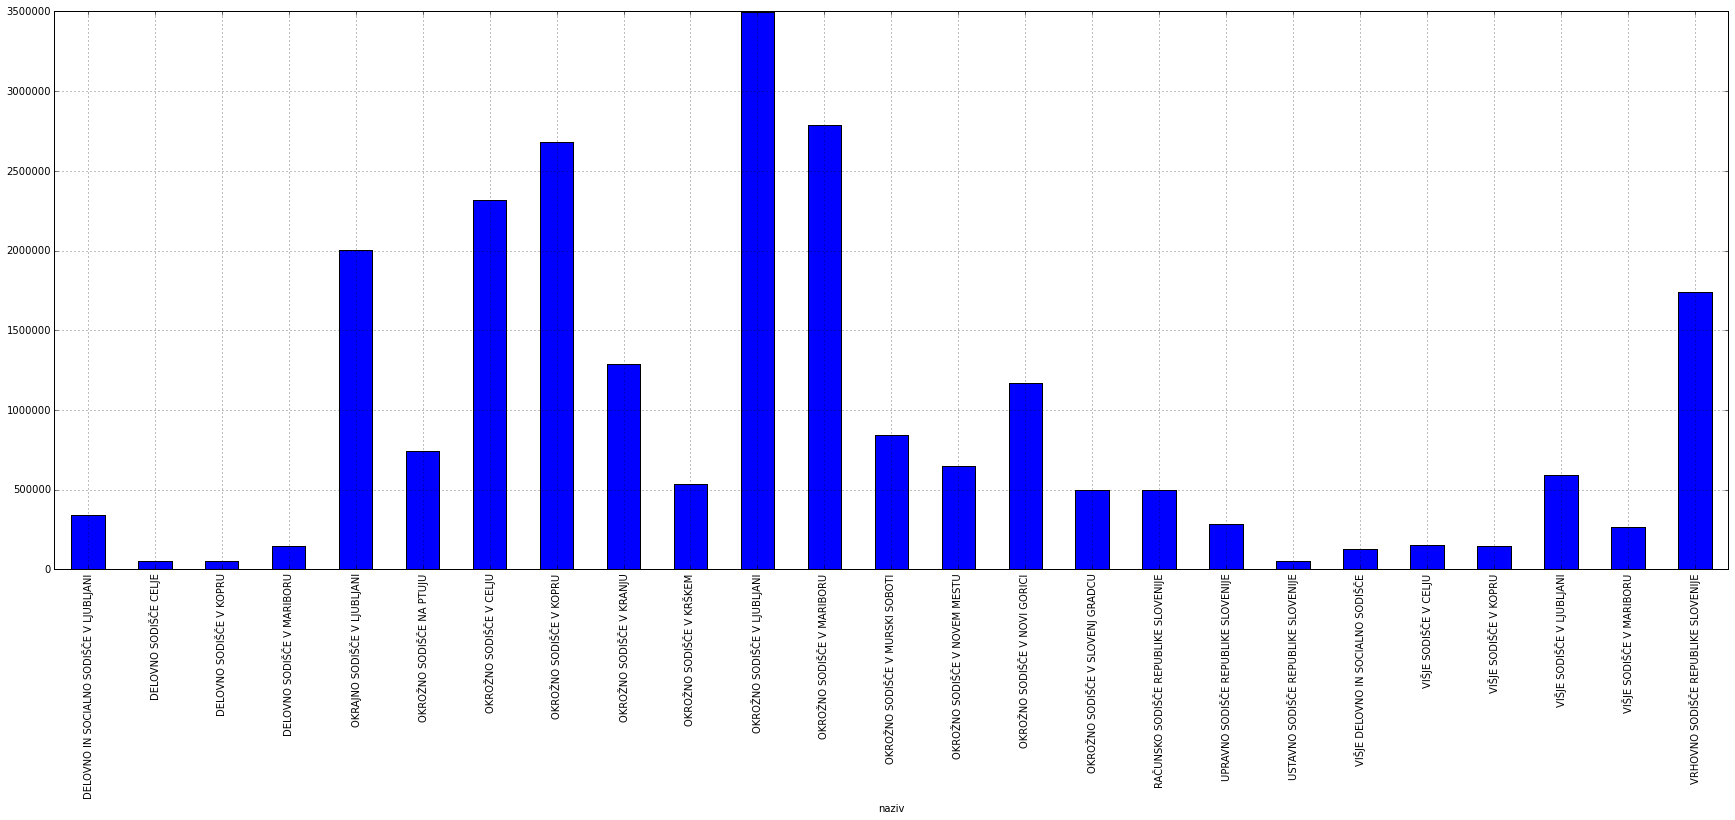

In [24]:
sodisce_df.groupby('naziv').sum().znesek_transakcije.plot(kind='bar', figsize=(30, 10))

## Group by two columns, just to show how it works

In [25]:
sodisce_df.groupby(['posta', 'naziv']).describe()

davcna  \
posta             naziv                                                     
CELJE             DELOVNO SODIŠČE CELJE            count        98.000000   
                                                   mean   19290870.000000   
                                                   std           0.287183   
                                                   min    19290870.000000   
                                                   25%    19290870.000000   
                                                   50%    19290870.000000   
                                                   75%    19290870.000000   
                                                   max    19290870.000000   
                  OKROŽNO SODIŠČE V CELJU          count      1180.000000   
                                                   mean   44824106.000000   
                                                   std           0.658989   
                                                   min    44824106.000000   
                                                   25%    44824106.000000   
                                                   50%    44824106.000000   
                                                   75%    44824106.000000   
                                                   max    44824106.000000   
                  VIŠJE SODIŠČE V CELJU            count        45.000000   
                                                   mean   82308853.000000   
                                                   std           0.000000   
                                                   min    82308853.000000   
                                                   25%    82308853.000000   
                                                   50%    82308853.000000   
                                                   75%    82308853.000000   
                                                   max    82308853.000000   
KOPER-CAPODISTRIA DELOVNO SODIŠČE V KOPRU          count        67.000000   
                                                   mean   58934294.000000   
                                                   std           0.000000   
                                                   min    58934294.000000   
                                                   25%    58934294.000000   
                                                   50%    58934294.000000   
...                                                                   ...   
NOVA GORICA       OKROŽNO SODIŠČE V NOVI GORICI    std           0.683486   
                                                   min    33069239.000000   
                                                   25%    33069239.000000   
                                                   50%    33069239.000000   
                                                   75%    33069239.000000   
                                                   max    33069239.000000   
NOVO MESTO        OKROŽNO SODIŠČE V NOVEM MESTU    count       345.000000   
                                                   mean   27842398.000000   
                                                   std           0.304997   
                                                   min    27842398.000000   
                                                   25%    27842398.000000   
                                                   50%    27842398.000000   
                                                   75%    27842398.000000   
                                                   max    27842398.000000   
PTUJ              OKROŽNO SODIŠČE NA PTUJU         count       521.000000   
                                                   mean   91674824.000000   
                                                   std           0.000000   
                                                   min    91674824.000000   
                                                   25%    91674824.000000   
                                                   50%    91674

In [26]:
sodisce_df.groupby(['posta', 'naziv']).znesek_transakcije.sum().head()

posta              naziv                  
CELJE              DELOVNO SODIŠČE CELJE        56029.00
                   OKROŽNO SODIŠČE V CELJU    2320461.72
                   VIŠJE SODIŠČE V CELJU       156519.82
KOPER-CAPODISTRIA  DELOVNO SODIŠČE V KOPRU      52929.68
                   OKROŽNO SODIŠČE V KOPRU    2682388.61
Name: znesek_transakcije, dtype: float64

In [27]:
sodisca_sum = sodisce_df.groupby(['posta', 'naziv']).znesek_transakcije.sum()

### Flatten groupby into DataFrame, so we can merge on it

In [28]:
sodisca_sum = sodisca_sum.reset_index()

In [29]:
sodisca_sum.columns = ['posta', 'naziv', 'znesek_transakcije_sum']

In [30]:
sodisca_sum.head()

,posta,naziv,znesek_transakcije_sum
0,CELJE,DELOVNO SODIŠČE CELJE,56029.00
1,CELJE,OKROŽNO SODIŠČE V CELJU,2320461.72
2,CELJE,VIŠJE SODIŠČE V CELJU,156519.82
3,KOPER-CAPODISTRIA,DELOVNO SODIŠČE V KOPRU,52929.68
4,KOPER-CAPODISTRIA,OKROŽNO SODIŠČE V KOPRU,2682388.61


In [31]:
sodisce_sum_df = sodisce_df.merge(sodisca_sum, 
                 how='inner', 
                 left_on='naziv', 
                 right_on='naziv')

In [32]:
sodisce_sum_df[['naziv', 'znesek_transakcije', 'znesek_transakcije_sum']].head()

,naziv,znesek_transakcije,znesek_transakcije_sum
0,OKROŽNO SODIŠČE V CELJU,2206.51,2320461.72
1,OKROŽNO SODIŠČE V CELJU,19.46,2320461.72
2,OKROŽNO SODIŠČE V CELJU,64.20,2320461.72
3,OKROŽNO SODIŠČE V CELJU,488.00,2320461.72
4,OKROŽNO SODIŠČE V CELJU,184.00,2320461.72


### Simple transformation on a row, to calculate percentage

It can be probably written even nicer with other Pandas functions

In [33]:
sodisce_sum_df['znesek_transakcije_proc'] = \
    sodisce_sum_df.apply(lambda row: row.loc['znesek_transakcije'] / row.loc['znesek_transakcije_sum'], axis=1).head()

In [34]:
sodisce_sum_df[['naziv', 'znesek_transakcije', 'znesek_transakcije_sum', 'znesek_transakcije_proc']].head()

,naziv,znesek_transakcije,znesek_transakcije_sum,znesek_transakcije_proc
0,OKROŽNO SODIŠČE V CELJU,2206.51,2320461.72,0.000951
1,OKROŽNO SODIŠČE V CELJU,19.46,2320461.72,0.000008
2,OKROŽNO SODIŠČE V CELJU,64.20,2320461.72,0.000028
3,OKROŽNO SODIŠČE V CELJU,488.00,2320461.72,0.000210
4,OKROŽNO SODIŠČE V CELJU,184.00,2320461.72,0.000079


### Example of writing out new data into Excel Spreadsheet

In [35]:
sodisce_sum_df.to_excel('output.xlsx')

# Sort by highest transaction

In [36]:
df.sort(['znesek_transakcije'], ascending=False).head()

,podracun_v_breme,datum_transakcije,znesek_transakcije,oznaka_valute_transakcije,racun_v_dobro,naziv_prejemnika,maticna_stevilka,davcna_stevilka,sifra_pu,zr_sns_oe,namen,maticna,davcna,naziv,kraj,obcina,naslov,postna_stevilka,posta
155421,011006300109972,2015-03-17,997058000,EUR,SI56011006000007298,UPRAVA REPUBLIKE SLOVENIJE ZA JAVNA PLAČILA,1572814000,10641424,16110,NaN,3238853 GLAVNICA OBVEZNIC RS,5028256000,23348887,MINISTRSTVO ZA FINANCE,Ljubljana,LJUBLJANA,Župančičeva ulica 003,1000,LJUBLJANA
155422,011006300109972,2015-03-17,100000000,EUR,SI56011006000007298,UPRAVA REPUBLIKE SLOVENIJE ZA JAVNA PLAČILA,1572814000,10641424,16110,NaN,3238854 GLAVNICA OBVEZNIC RS,5028256000,23348887,MINISTRSTVO ZA FINANCE,Ljubljana,LJUBLJANA,Župančičeva ulica 003,1000,LJUBLJANA
156049,011006300109972,2015-03-30,91000000,EUR,SI56011006030264023,ZAVOD ZA POKOJNINSKO IN INVALIDSKO ZAVAROVANJE...,5156700000,85876500,16110,NaN,3277721 OBVEZNOSTI DRŽAVE- DOTACIJ,5028256000,23348887,MINISTRSTVO ZA FINANCE,Ljubljana,LJUBLJANA,Župančičeva ulica 003,1000,LJUBLJANA
155085,011006300109972,2015-03-02,80000000,EUR,SI56010000001000153,BANKA KOPER d.d.,5092221000,98026305,16110,1611-15-00989,3207091 GLAVNICA OBVEZNIC RS,5028256000,23348887,MINISTRSTVO ZA FINANCE,Ljubljana,LJUBLJANA,Župančičeva ulica 003,1000,LJUBLJANA
156050,011006300109972,2015-03-30,76875000,EUR,SI56011006000007298,UPRAVA REPUBLIKE SLOVENIJE ZA JAVNA PLAČILA,1572814000,10641424,16110,NaN,3276697 OBRESTI OBVEZNIC RS,5028256000,23348887,MINISTRSTVO ZA FINANCE,Ljubljana,LJUBLJANA,Župančičeva ulica 003,1000,LJUBLJANA


# Time Series

In [37]:
df.head()

,podracun_v_breme,datum_transakcije,znesek_transakcije,oznaka_valute_transakcije,racun_v_dobro,naziv_prejemnika,maticna_stevilka,davcna_stevilka,sifra_pu,zr_sns_oe,namen,maticna,davcna,naziv,kraj,obcina,naslov,postna_stevilka,posta
0,012516030657428,2015-03-02,41.17,EUR,SI56031211061120871,KOPIJA-NOVA družba za trgovino in storitve d.o.o.,1491482000,10031332,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
1,012516030657428,2015-03-02,988.04,EUR,SI56051008010777371,SAOP Računalništvo d.o.o.,5383129000,79407340,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
2,012516030657428,2015-03-02,91.10,EUR,SI56029230020267126,"PETROL, Slovenska energetska družba, d.d., Lju...",5025796000,80267432,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
3,012516030657428,2015-03-02,463.47,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
4,012516030657428,2015-03-02,1262.06,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE


In [38]:
df['date'] = pd.to_datetime(df['datum_transakcije'])

In [39]:
df.date.describe()

count                  481167
unique                     22
top       2015-03-05 00:00:00
freq                    51435
first     2015-03-02 00:00:00
last      2015-03-31 00:00:00
Name: date, dtype: object

In [40]:
df_dates = df.set_index('date')
df_dates.head()

,podracun_v_breme,datum_transakcije,znesek_transakcije,oznaka_valute_transakcije,racun_v_dobro,naziv_prejemnika,maticna_stevilka,davcna_stevilka,sifra_pu,zr_sns_oe,namen,maticna,davcna,naziv,kraj,obcina,naslov,postna_stevilka,posta
date,,,,,,,,,,,,,,,,,,,
2015-03-02,012516030657428,2015-03-02,41.17,EUR,SI56031211061120871,KOPIJA-NOVA družba za trgovino in storitve d.o.o.,1491482000,10031332,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
2015-03-02,012516030657428,2015-03-02,988.04,EUR,SI56051008010777371,SAOP Računalništvo d.o.o.,5383129000,79407340,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
2015-03-02,012516030657428,2015-03-02,91.10,EUR,SI56029230020267126,"PETROL, Slovenska energetska družba, d.d., Lju...",5025796000,80267432,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
2015-03-02,012516030657428,2015-03-02,463.47,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE
2015-03-02,012516030657428,2015-03-02,1262.06,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,NaN,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE


In [41]:
df_date = df.reset_index().set_index('date', drop=False)
df_date.head()

,index,podracun_v_breme,datum_transakcije,znesek_transakcije,oznaka_valute_transakcije,racun_v_dobro,naziv_prejemnika,maticna_stevilka,davcna_stevilka,sifra_pu,...,namen,maticna,davcna,naziv,kraj,obcina,naslov,postna_stevilka,posta,date
date,,,,,,,,,,,,,,,,,,,,,
2015-03-02,0,012516030657428,2015-03-02,41.17,EUR,SI56031211061120871,KOPIJA-NOVA družba za trgovino in storitve d.o.o.,1491482000,10031332,65749,...,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE,2015-03-02
2015-03-02,1,012516030657428,2015-03-02,988.04,EUR,SI56051008010777371,SAOP Računalništvo d.o.o.,5383129000,79407340,65749,...,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE,2015-03-02
2015-03-02,2,012516030657428,2015-03-02,91.10,EUR,SI56029230020267126,"PETROL, Slovenska energetska družba, d.d., Lju...",5025796000,80267432,65749,...,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE,2015-03-02
2015-03-02,3,012516030657428,2015-03-02,463.47,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,...,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE,2015-03-02
2015-03-02,4,012516030657428,2015-03-02,1262.06,EUR,SI56042020000490563,"ERA GOOD trgovina, storitve d.o.o.",1695347000,90056418,65749,...,NaN,5087929000,56311761,OSNOVNA ŠOLA KOZJE,Kozje,KOZJE,Kozje 131,3260,KOZJE,2015-03-02


### Examples of different periods

In [42]:
df_date['date'].resample('W-SUN', how='count', kind='period')

date
2015-03-02/2015-03-08    134954
2015-03-09/2015-03-15    113789
2015-03-16/2015-03-22     97609
2015-03-23/2015-03-29     67902
2015-03-30/2015-04-05     66913
Freq: W-SUN, Name: date, dtype: int64

### For each week, we count and calculate sum and mean of all the transactions

In [43]:
df_date['znesek_transakcije'].resample('W-MON', how=['count', np.sum, np.mean], kind='period')

,count,sum,mean
date,,,
2015-02-24/2015-03-02,26406,1.237405e+08,4686.075282
2015-03-03/2015-03-09,131639,4.017159e+08,3051.648265
2015-03-10/2015-03-16,116030,3.679257e+08,3170.953343
2015-03-17/2015-03-23,85703,1.371316e+09,16000.788211
2015-03-24/2015-03-30,82313,3.187845e+08,3872.833412
2015-03-31/2015-04-06,39076,1.532536e+08,3921.935548


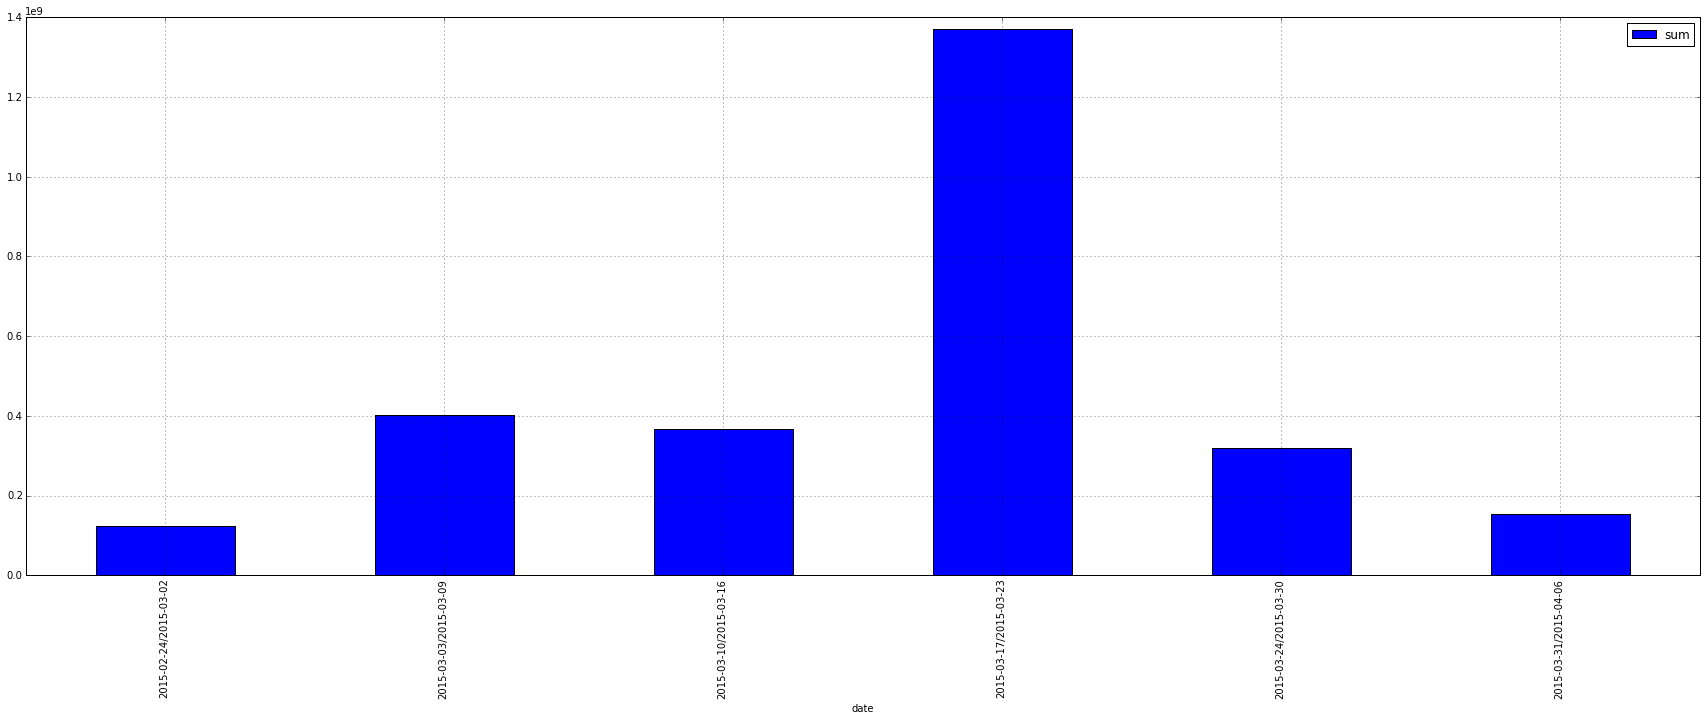

In [44]:
df_date['znesek_transakcije'] \
    .resample('W-MON', how=[np.sum], kind='period') \
    .plot(kind='bar',
          figsize=(30,10))